Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Your answer here.

<font color=steelblue, size=3> Problem: How can the city authority decide which buildings are environmentally friendly based on their energy efficiency performance?
The interpretability is important because the rating may involve the interest of multiple stakeholders, such as the residents, real estate companies who might be subject to additional tax due to bad building energy performance, construction companies who need a guidance to construct energy efficient new buildings, etc. Hence the decision model must be transparent and interpretable so that the public can be convinced. 
Compared with decision tree, random forest is much less intuitive and interpretable than decision tree. </font>

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Your answer here.

<font color=steelblue, size=3> Problem: How can the police force fight against terrorist attack in a mass event like Time Square new year counting down, by accurately distinguish the terrorists from the crowd and stop them before anything happen?
The accuracy is important because hundreds of peoples lives count on it. We must get the result correct. In addition, we don't want mistake good people with terrorist. 
Random forest outperforms decision tree thanks to its accuracy. </font>

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Your answer here.

<font color=steelblue, size=3> To get some interpretability from random forest classifier, one possible approach is to aproximate the model by a simpler model that is more interpretable to human(Hara S., Hayashi K., 2016). To Obtain the simpler model, an EM algorithm should be developed with minimal KL divergence from the complex ensemble. </font>

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [52]:
import pandas as pd
import numpy as np

In [53]:
from StringIO import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [54]:
# your code here
print("the most common MPG value is: {}".format(df.MPG.value_counts().index[0]))

the most common MPG value is: bad


In [55]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [62]:
for i in range(len(df.cylinders.unique())):
    print("Q{}: cylinder > {}?".format(i+1, df.cylinders.unique()[i]))
    goodY = df[(df.cylinders > df.cylinders.unique()[i]) & (df.MPG == "good")].count()[0]
    badY = df[(df.cylinders > df.cylinders.unique()[i]) & (df.MPG == "bad")].count()[0]
    goodN = df[(df.cylinders <= df.cylinders.unique()[i]) & (df.MPG == "good")].count()[0]
    badN = df[(df.cylinders <= df.cylinders.unique()[i]) & (df.MPG == "bad")].count()[0]
    print("The infrmation gain at this node is: {}".format(InformationGain(goodY, badY, goodN, badN)))

Q1: cylinder > 4?
The infrmation gain at this node is: 0.365293897532
Q2: cylinder > 6?
The infrmation gain at this node is: 0.122556248918
Q3: cylinder > 8?
The infrmation gain at this node is: 0.0


In [68]:
for i in range(len(df.weight.unique())):
    print("Q{}: cylinder = {}?".format(i+4, df.weight.unique()[i]))
    goodY = df[(df.weight == df.weight.unique()[i]) & (df.MPG == "good")].count()[0]
    badY = df[(df.weight == df.weight.unique()[i]) & (df.MPG == "bad")].count()[0]
    goodN = df[(df.weight != df.weight.unique()[i]) & (df.MPG == "good")].count()[0]
    badN = df[(df.weight != df.weight.unique()[i]) & (df.MPG == "bad")].count()[0]
    print("The infrmation gain at this node is: {}".format(InformationGain(goodY, badY, goodN, badN)))

Q4: cylinder = light?
The infrmation gain at this node is: 0.0971071794515
Q5: cylinder = medium?
The infrmation gain at this node is: 8.881784197e-17
Q6: cylinder = weighty?
The infrmation gain at this node is: 0.15307795339


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [59]:
# your code here
df_sorted = df.sort_values(["HP"]).reset_index()
df_sorted

,index,MPG,cylinders,HP,weight
0,15,good,4,65,light
1,0,good,4,75,light
2,17,good,4,81,light
3,16,bad,6,85,medium
4,14,good,4,89,medium
5,1,bad,6,90,medium
6,11,good,4,92,medium
7,19,bad,4,93,light
8,5,bad,4,94,light
9,18,bad,6,95,medium


In [60]:
for i in range((len(df_sorted.HP) - 1)):
    threshold = (df_sorted.HP[i] + df_sorted.HP[i+1])/2.
    print("Q{}: HP > {}?".format(i, threshold))
    goodY = df_sorted[(df_sorted.HP > threshold) & (df_sorted.MPG == "good")].count()[0]
    badY = df_sorted[(df_sorted.HP > threshold) & (df_sorted.MPG == "bad")].count()[0]
    goodN = df_sorted[(df_sorted.HP <= threshold) & (df_sorted.MPG == "good")].count()[0]
    badN = df_sorted[(df_sorted.HP <= threshold) & (df_sorted.MPG == "bad")].count()[0]
    print("The infrmation gain at this node is: {}".format(InformationGain(goodY, badY, goodN, badN)))

Q0: HP > 70.0?
The infrmation gain at this node is: 0.105914933394
Q1: HP > 78.0?
The infrmation gain at this node is: 0.226257944976
Q2: HP > 83.0?
The infrmation gain at this node is: 0.367102656103
Q3: HP > 87.0?
The infrmation gain at this node is: 0.214170945008
Q4: HP > 89.5?
The infrmation gain at this node is: 0.365776599471
Q5: HP > 91.0?
The infrmation gain at this node is: 0.275926745594
Q6: HP > 92.5?
The infrmation gain at this node is: 0.509185925461
Q7: HP > 93.5?
The infrmation gain at this node is: 0.429504523289
Q8: HP > 94.5?
The infrmation gain at this node is: 0.365293897532
Q9: HP > 95.0?
The infrmation gain at this node is: 0.223356870468
Q10: HP > 95.0?
The infrmation gain at this node is: 0.223356870468
Q11: HP > 97.5?
The infrmation gain at this node is: 0.223356870468
Q12: HP > 100.0?
The infrmation gain at this node is: 0.15307795339
Q13: HP > 105.0?
The infrmation gain at this node is: 0.15307795339
Q14: HP > 124.5?
The infrmation gain at this node is: 0.12

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

Your answer here.

To choose the optimal binary split node we should refer to the information gain score at each node. Higher score means better split. From the results in b and c, we can conclude that the optimal split is: "HP > 92.5?". Judging from the dataset, its child node "HP <= 92.5" would require further partitioning.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [70]:
# your code here
df1 = df[df.HP <= 92.5]
df1

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


In [71]:
print("the most common MPG value is: {}".format(df1.MPG.value_counts().index[0]))

the most common MPG value is: good


In [72]:
for i in range(len(df1.cylinders.unique())):
    print("Q{}: cylinder > {}?".format(i+1, df1.cylinders.unique()[i]))
    goodY = df1[(df1.cylinders > df1.cylinders.unique()[i]) & (df1.MPG == "good")].count()[0]
    badY = df1[(df1.cylinders > df1.cylinders.unique()[i]) & (df1.MPG == "bad")].count()[0]
    goodN = df1[(df1.cylinders <= df1.cylinders.unique()[i]) & (df1.MPG == "good")].count()[0]
    badN = df1[(df1.cylinders <= df1.cylinders.unique()[i]) & (df1.MPG == "bad")].count()[0]
    print("The infrmation gain at this node is: {}".format(InformationGain(goodY, badY, goodN, badN)))

Q1: cylinder > 4?
The infrmation gain at this node is: 0.863120568567
Q2: cylinder > 6?
The infrmation gain at this node is: 0.0


In [73]:
for i in range(len(df1.weight.unique())):
    print("Q{}: cylinder = {}?".format(i+4, df1.weight.unique()[i]))
    goodY = df1[(df.weight == df1.weight.unique()[i]) & (df1.MPG == "good")].count()[0]
    badY = df1[(df1.weight == df1.weight.unique()[i]) & (df1.MPG == "bad")].count()[0]
    goodN = df1[(df1.weight != df1.weight.unique()[i]) & (df1.MPG == "good")].count()[0]
    badN = df1[(df1.weight != df1.weight.unique()[i]) & (df1.MPG == "bad")].count()[0]
    print("The infrmation gain at this node is: {}".format(InformationGain(goodY, badY, goodN, badN)))

Q4: cylinder = light?
The infrmation gain at this node is: 0.291691997138
Q5: cylinder = medium?
The infrmation gain at this node is: 0.291691997138


D:\ana\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
df1_sorted = df1.sort_values(["HP"]).reset_index()
df1_sorted

,index,MPG,cylinders,HP,weight
0,15,good,4,65,light
1,0,good,4,75,light
2,17,good,4,81,light
3,16,bad,6,85,medium
4,14,good,4,89,medium
5,1,bad,6,90,medium
6,11,good,4,92,medium


In [75]:
for i in range((len(df1_sorted.HP) - 1)):
    threshold = (df1_sorted.HP[i] + df1_sorted.HP[i+1])/2.
    print("Q{}: HP > {}?".format(i, threshold))
    goodY = df1_sorted[(df1_sorted.HP > threshold) & (df1_sorted.MPG == "good")].count()[0]
    badY = df1_sorted[(df1_sorted.HP > threshold) & (df1_sorted.MPG == "bad")].count()[0]
    goodN = df1_sorted[(df1_sorted.HP <= threshold) & (df1_sorted.MPG == "good")].count()[0]
    badN = df1_sorted[(df1_sorted.HP <= threshold) & (df1_sorted.MPG == "bad")].count()[0]
    print("The infrmation gain at this node is: {}".format(InformationGain(goodY, badY, goodN, badN)))

Q0: HP > 70.0?
The infrmation gain at this node is: 0.0760098536628
Q1: HP > 78.0?
The infrmation gain at this node is: 0.16958442967
Q2: HP > 83.0?
The infrmation gain at this node is: 0.291691997138
Q3: HP > 87.0?
The infrmation gain at this node is: 0.00597771142377
Q4: HP > 89.5?
The infrmation gain at this node is: 0.0617433579328
Q5: HP > 91.0?
The infrmation gain at this node is: 0.0760098536628


we can conclude that the optimal split is: "cylinder > 4?". Judging from the dataset, there is no need for further partitioning. 

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Your answer here.

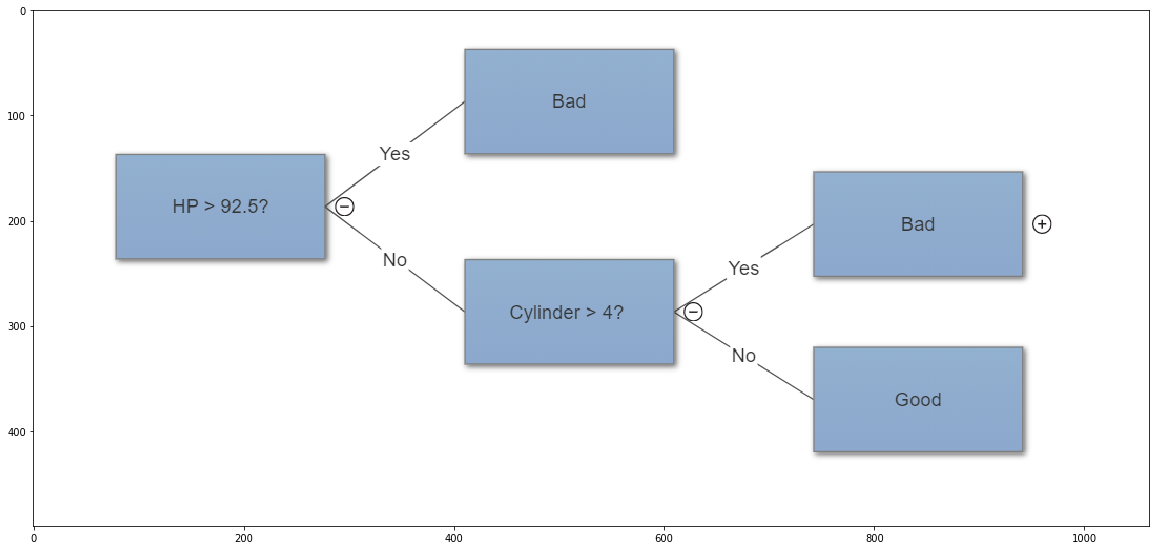

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
img = mpimg.imread('DT.png')
ax.imshow(img)
plt.show()

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light

?,6,113,medium

?,4,83,weighty

?,4,95,weighty


In [78]:
test = StringIO('MPG,cylinders,HP,weight\n null,8,70,light\n null,6,113,medium\n null,4,83,weighty\n null,4,95,weighty')
test_df = pd.read_csv(test)
test_df

,MPG,cylinders,HP,weight
0,null,8,70,light
1,null,6,113,medium
2,null,4,83,weighty
3,null,4,95,weighty


In [79]:
for i in range(len(test_df)):
    if test_df.iloc[i, 2] > 92.5:
        test_df.iloc[i, 0] = 'bad'
    elif test_df.iloc[i, 1] > 4:
        test_df.iloc[i, 0] = 'bad'
    else:
        test_df.iloc[i, 0] = 'good'

In [80]:
test_df

,MPG,cylinders,HP,weight
0,bad,8,70,light
1,bad,6,113,medium
2,good,4,83,weighty
3,bad,4,95,weighty


### Question 3, Predicting burden of disease （40 pts)

In [81]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# your code here
from sklearn.metrics import roc_auc_score
# remove records with any missing values
data=data.dropna()
# Find the target variable. 
y=data.loc[:,"BurdenOfDisease"]
# Get the feature space
X=data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]
X=pd.get_dummies(X)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=123)
print X_train.head(3)

     FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
45             1.0             0.00              21268            0.99010   
81             1.0             2.39              11814            0.23762   
125            1.0             0.18              51021            0.69307   

     SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
45             0.99010            0.99010            0.99010   
81             0.75248            0.13861            0.50495   
125            0.84158            0.47525            0.70297   

     TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
45                0.074                   0.765                   0.0005   
81                0.047                   0.617                   0.4080   
125               0.045                   0.443                   0.0010   

     PCptaGovtExpHlthAvgExcRt  GDPPCptaIntDol  AdultLtrcyRate  FemaleLtrcyRate  
45                       1766           30415   

In [83]:
OS=[]
for i in range(2,50,2):
    dt=DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
print np.mean(OS)

0.651709401709


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

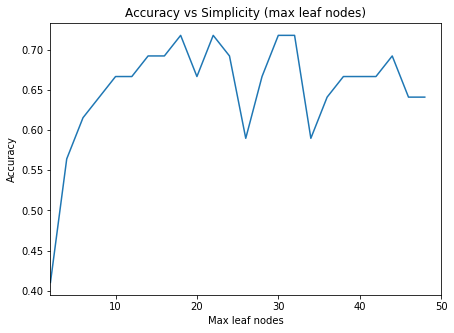

In [84]:
import matplotlib.pylab as plt

# your code here
plt.figure(figsize=(7,5))
plt.plot(range(2,50,2),OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Simplicity (max leaf nodes)")
plt.xlim(2,50)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [93]:
from sklearn.model_selection import GridSearchCV

# your code here
param_grid = {'max_leaf_nodes':range(2,50,2)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs=gr.fit(X_train,y_train)
print rs.best_params_
print 'Out of sample accuracy:', rs.score(X_test,y_test)

{'max_leaf_nodes': 6}
Out of sample accuracy: 0.641025641026


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [20]:
from sklearn import tree

# your code here
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print thestring

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2349.5, samples = 91, value = [24, 21, 24, 22], class = awful", fillcolor="#e5813900"] ;
1 [label="SustAccImprSanUrb <= 0.663, samples = 36, value = [24, 12, 0, 0], class = awful", fillcolor="#e581397f"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 28, value = [23, 5, 0, 0], class = awful", fillcolor="#e58139c8"] ;
1 -> 2 ;
3 [label="samples = 8, value = [1, 7, 0, 0], class = high", fillcolor="#47e539db"] ;
1 -> 3 ;
4 [label="SustAccImprSanRur <= 0.624, samples = 55, value = [0, 9, 24, 22], class = low", fillcolor="#399de50f"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 33, value = [0, 8, 5, 20], class = medium", fillcolor="#d739e57a"] ;
4 -> 5 ;
6 [label="samples = 22, value = [0, 1, 19, 2], class = low", fillcolor="#399de5d9"] ;
4 -> 6 ;
}


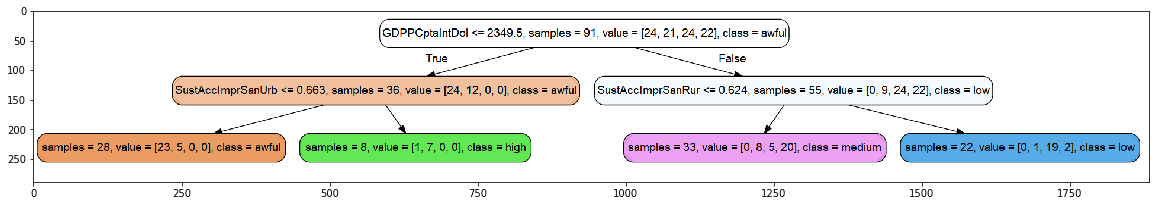

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,1,1)
img = mpimg.imread('decisionT.png')
ax.imshow(img)
plt.show()

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=10)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
pred

array([ 0.14349167,  0.3870244 ,  0.50790489,  0.45167489,  0.20106005,
        0.01473856,  0.36077347,  0.47248195,  0.0060084 ,  0.0902399 ,
        0.19909511,  0.31434448,  0.40042533,  0.54187587,  0.0060084 ,
        0.16839707,  0.35938335,  0.4230017 ,  0.0928655 ,  0.31718572,
        0.1895605 ,  0.18070728,  0.24075952,  0.09008593,  0.32108629,
        0.04321078,  0.1305465 ,  0.44303414,  0.00918301,  0.240211  ,
        0.47663502,  0.20421754,  0.0060084 ,  0.44529779,  0.03457983,
        0.02071429,  0.32430437,  0.61798569,  0.13697378])

In [95]:
# accuracy before tuning hyper parameter
print 'Out of sample accuracy:', rf.score(X_test,y_test)

Out of sample accuracy: 0.564102564103


In [96]:
# tuning hyper parameter 
param_grid = {'max_leaf_nodes':range(2,50,2)}
rf = RandomForestClassifier(n_estimators=30, n_jobs = -1)
gs = GridSearchCV(rf, param_grid=param_grid)
rs = gs.fit(X_train, y_train)
print rs.best_params_

{'max_leaf_nodes': 8}


In [51]:
# accuracy after tuning hyper parameter
print 'Out of sample accuracy:', rs.score(X_test,y_test)

Out of sample accuracy: 0.641025641026


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Your answer here.

Judging from the accuracy scores of the two models, the random forest after hyper parameter being tuned got a score of 0.641 which is larger than its counterpart of decision tree (after hyper parameter tuning). This indicate that random forest model have a better accuracy performance than decision tree model, which complies with our expectation. 

As for interpretability, although in this case both model are implemented using sklearn package, we are still able to draw a simple, interpretable diagram to show the decision flow of the decision tree model. However, it would be impossible for visualizing Random Forest model using simple diagram. Hence, decision tree has much better interpretability. 